In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt

import pandas as pd
import datetime


In [2]:
import theano
import theano.tensor as tt
theano.config.gcc.cxxflags = "-Wno-c++11-narrowing"

def tt_lognormal(x, mu, sigma):
    x = tt.clip(x,1e-12,1e12) # Checks to improve stability and resilience against NANs
    
    distr = 1/x* tt.exp(-((tt.log(x) - mu) ** 2) / (2 * sigma ** 2))
    return distr / (tt.sum(distr, axis=0)+1e-9)

d = tt.vector()
s_lognormal_median = tt.scalar()
s_lognormal_sigma = tt.scalar()

s_beta = tt_lognormal(d, tt.log(s_lognormal_median), s_lognormal_sigma)
f_beta = theano.function([d,s_lognormal_median,s_lognormal_sigma],[s_beta])

In [3]:
onsets_start = datetime.date(2020,2,16)
publish_start =datetime.date(2020,3,4)
now = datetime.date(2020,5,18)
print((now-onsets_start).days,(now-publish_start).days)

92 75


In [6]:
startdate = datetime.date(2020,3,8)
deaths = {}
deaths[200508] = [1, 2, 1, 1, 3, 2, 2, 3, 10, 12, 12, 20, 38, 23, 39, 38, 64, 74, 87, 101, 106, 115, 170, 157, 161, 199, 192, 218, 232, 238, 244, 244, 242, 233, 232, 222, 229, 236, 219, 221, 221, 171, 195, 200, 159, 177, 136, 152, 116, 129, 114, 100, 109, 104, 80, 62, 77, 68, 64, 38, 2]
deaths[200512] = [1, 3, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 39, 24, 40, 41, 65, 74, 89, 101, 107, 116, 170, 158, 160, 201, 192, 220, 232, 239, 245, 245, 245, 232, 233, 224, 234, 237, 219, 225, 224, 175, 197, 201, 162, 183, 142, 154, 119, 133, 118, 108, 110, 106, 88, 66, 80, 73, 76, 60, 44, 39, 33, 26, 11]
deaths[200513] = [1, 3, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 39, 24, 40, 40, 65, 74, 90, 101, 107, 115, 171, 160, 160, 199, 195, 220, 232, 238, 245, 245, 245, 232, 235, 225, 236, 239, 219, 226, 225, 175, 199, 202, 162, 184, 144, 154, 120, 133, 118, 111, 113, 109, 91, 67, 81, 74, 80, 65, 46, 48, 39, 46, 30, 5]
deaths[200514] = [1, 3, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 39, 24, 40, 40, 65, 74, 89, 101, 107, 115, 169, 162, 161, 198, 195, 220, 232, 239, 244, 244, 245, 232, 235, 228, 236, 240, 219, 226, 226, 176, 200, 201, 164, 185, 145, 155, 120, 134, 118, 113, 117, 111, 95, 70, 84, 76, 82, 67, 48, 49, 43, 52, 48, 18, 4]
deaths[200515] = [1, 2, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 39, 24, 40, 40, 65, 74, 90, 102, 107, 115, 170, 162, 163, 199, 195, 220, 233, 237, 246, 249, 248, 233, 236, 229, 235, 241, 219, 229, 227, 178, 201, 203, 166, 187, 145, 155, 121, 136, 118, 118, 122, 114, 97, 73, 85, 74, 82, 69, 50, 50, 45, 55, 53, 30, 23, 9]
deaths[200516] = [1, 2, 1, 1, 4, 2, 2, 4, 10, 12, 12, 20, 38, 24, 40, 39, 65, 75, 89, 102, 107, 114, 170, 162, 163, 199, 195, 221, 233, 239, 246, 251, 251, 233, 238, 229, 235, 241, 218, 232, 228, 179, 202, 204, 166, 187, 147, 155, 121, 139, 116, 119, 123, 114, 97, 75, 86, 75, 84, 72, 50, 50, 47, 57, 54, 32, 30, 28, 5]
deaths[200517] = [1, 2, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 39, 24, 41, 40, 64, 75, 90, 102, 106, 115, 170, 162, 163, 199, 195, 220, 234, 239, 246, 251, 251, 232, 238, 229, 237, 241, 218, 232, 229, 180, 203, 204, 168, 187, 147, 155, 121, 140, 119, 120, 122, 115, 98, 75, 87, 75, 84, 72, 51, 50, 49, 58, 56, 35, 35, 34, 9]
deaths[200518] = [1, 2, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 39, 24, 41, 40, 65, 75, 89, 102, 107, 115, 170, 162, 163, 199, 195, 221, 234, 239, 246, 252, 252, 232, 238, 229, 237, 240, 219, 232, 229, 180, 203, 204, 168, 187, 147, 156, 121, 140, 121, 120, 123, 115, 98, 75, 87, 76, 83, 72, 51, 50, 50, 58, 56, 38, 35, 36, 14, 2, 4]
deaths[200519] = [1, 2, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 39, 24, 41, 40, 65, 75, 91, 102, 107, 115, 170, 162, 163, 199, 195, 221, 234, 239, 246, 253, 251, 232, 238, 230, 238, 240, 220, 232, 229, 181, 204, 204, 167, 188, 148, 156, 122, 140, 123, 122, 124, 115, 98, 76, 89, 76, 85, 72, 52, 51, 53, 58, 56, 39, 40, 40, 23, 11, 13, 8]
deaths[200520] = [1, 2, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 39, 24, 41, 40, 65, 75, 91, 102, 107, 115, 170, 162, 163, 200, 195, 221, 234, 240, 247, 254, 252, 235, 239, 234, 237, 240, 220, 234, 230, 183, 205, 205, 168, 188, 148, 156, 122, 141, 123, 122, 124, 116, 98, 76, 91, 77, 86, 72, 55, 52, 55, 60, 58, 40, 43, 45, 33, 20, 17, 20, 6]
deaths[200521] = [1, 2, 1, 1, 4, 2, 3, 4, 11, 12, 12, 21, 39, 24, 41, 40, 65, 75, 92, 102, 107, 115, 170, 162, 162, 201, 195, 221, 234, 241, 248, 254, 252, 235, 239, 234, 237, 240, 220, 234, 231, 183, 205, 205, 168, 189, 148, 156, 122, 140, 124, 121, 124, 116, 100, 75, 90, 76, 86, 73, 56, 54, 58, 59, 60, 40, 43, 47, 35, 23, 24, 27, 23, 6]


for k,v in deaths.items():
    v.append(0)

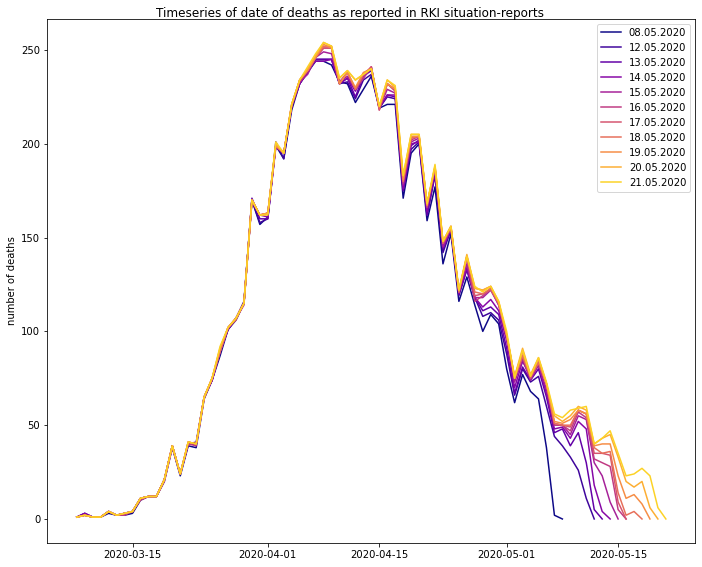

In [7]:
keys = sorted(deaths.keys())
ts = pd.date_range(startdate,periods=len(deaths[keys[-1]]),freq='D')

fig, axes = plt.subplots(1, 1, figsize = (10,8),squeeze=False)
fig.subplots_adjust(wspace=0.15,hspace=0.14,left=0.08,right=0.98,top=0.96,bottom=0.05)
#fig.suptitle("SEIR Model observation = onset-reporting-Matrix")

ax = axes[0,0]
plasma = plt.cm.plasma

for i,k in enumerate(sorted(deaths.keys())):
    v = deaths[k]
    c = plasma(i/len(deaths))
    ks = "%d"%k
    l = "%s.%s.20%s"%(ks[4:],ks[2:4],ks[:2])
    ax.plot(ts[:len(v)],v,label=l,color=c)
    
ax.set_ylabel("number of deaths")
ax.legend()
fig.suptitle("Timeseries of date of deaths as reported in RKI situation-reports")
plt.savefig("RKI-deaths.pdf")
plt.savefig("RKI-deaths.svg")


In [93]:
# sequences (if any), prior result(s) (if needed), non-sequences (if any)
import theano.tensor.signal.conv as tt_conv
theano.config.gcc.cxxflags = "-Wno-c++11-narrowing" # not neede in actual model, but I can't find my but at the moment

d = tt.dvector()
s_median_incubation = tt.dscalar()
s_sigma_incubation = tt.dscalar()

s_beta = tt_lognormal(d, tt.log(s_median_incubation), s_sigma_incubation)
f_beta = theano.function([d,s_median_incubation,s_sigma_incubation],[s_beta])

def theano_convolve_inputrotation(inp,filt,amplitude=1,offset=0):
    """ convolves inp with filter,
        scales by amplitude,
        additional offset in positions
      --> ouput vector has length 2*inp+filt """
    # Symbolic variables for theano
    o = tt.scalar('o',dtype='int64')
    a = tt.matrix('a',dtype='float64')
    b = tt.matrix('b',dtype='float64')
    s = tt.scalar('s',dtype='float64')
    
    # Enlarge the input in order to accomodate an offset
    zero = tt.zeros_like(a)
    a0 = tt.concatenate((a,zero,),1)
    a0r = tt.roll(a0,o,1) # delay the input signal by offset
    a0rp = tt.set_subtensor(a0r[0,:o],0) * s # set front of enlarged input_vector to zero to prevent roll overspill at front
    
    # Convolve enlarged,delayed input with filter
    func = tt.signal.conv.conv2d(a0rp,b,(1,inp.shape[0]*2),(1,filt.shape[0]),border_mode='full')
    # Bild a function
    return theano.function([a,b,s,o],func)(inp[None,:],filt[None,:],amplitude,offset)

def SEIR_model_deaths(N, imported_t,lambda_t,median_incubation,sigma_incubation,median_death,sigma_death,f_death,l=32):
    N = tt.cast(N,'float64')
    beta = f_beta(range(l),median_incubation,sigma_incubation)[0]
    
    s_imported_t = tt.vector()
    s_lambda_t = tt.vector()
    s_infected_t = tt.vector()
    p_infected = tt.dvector("internal state")
    

    def imported_day_acc(lambda_at_t,imported_at_t,p_infected,N_at_t,beta,N):
        f = N_at_t / N
        new = imported_at_t + theano.dot(p_infected,beta) * lambda_at_t * f
        p_infected = tt.roll(p_infected,1,0)
        p_infected = tt.set_subtensor(p_infected[:1],new)
        return new,p_infected,N_at_t-new
    
    outputs_info = [None,np.zeros(l),N]
    infected_t,updates = theano.scan(fn=imported_day_acc,
                                     sequences=[s_lambda_t,s_imported_t],
                                     outputs_info=outputs_info,
                                     non_sequences=[beta,N])
    calc_infected = theano.function(inputs=[s_lambda_t,s_imported_t],outputs=infected_t,updates=updates)
    newI,I,N = calc_infected(lambda_t,imported_t)
    
    # To achieve different delays, update either the distribution bd,bh or the offset in theano_convolve
    r = np.arange(64)
    bd = f_beta(r,median_death,sigma_death)[0] # Generate lognormal delay-functions
    # Delay newI through convolution to generate new hospitalization and new deaths
    newD = theano_convolve_inputrotation(newI,bd,f_death,0)[0]
    
    return newI,newD

80
80
80
80


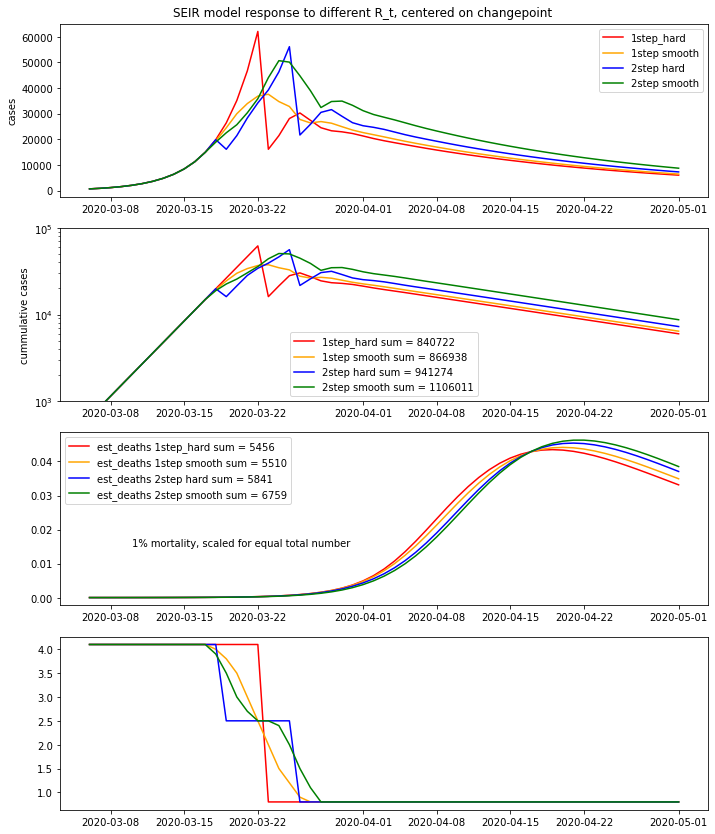

In [181]:
startdate = datetime.date(2020,2,12)
l = 80
ts = pd.date_range(startdate,periods=l,freq='D')
imported_at = np.array([1.5]*4+[0]*(l-4),dtype=np.float64)
#r = np.array([1.1]*100)

cp_hard = datetime.date(2020,3,23)
ocp_hard = (cp_hard-startdate).days
R_t_4hard = np.array([4.1]*ocp_hard+[0.8]*(l-ocp_hard),dtype=np.float64)
R_t_2step = np.array([4.1]*(ocp_hard-4)+[2.5]*7+[0.8]*(l-ocp_hard-3),dtype=np.float64)
R_t_2smooth = np.array([4.1]*(ocp_hard-5)+[3.9,3.5,3,2.7]+[2.5]*2+[2.4,2,1.5,1.1]+[0.8]*(l-ocp_hard-5),dtype=np.float64)
R_t_4_7d = np.array([4.1]*(ocp_hard-5)+[4,3.8,3.5,3,2.5,2,1.5,1.2,.9]+[.8]*(l-ocp_hard-4))
 

fig, axes = plt.subplots(4,1 , figsize = (10,12),squeeze=False)
fig.subplots_adjust(wspace=0.15,hspace=0.18,left=0.08,right=0.98,top=0.96,bottom=0.05)
ax,bx,cx,dx = axes[0,0],axes[1,0],axes[2,0],axes[3,0]
plasma = plt.cm.plasma


for k,R_t,c in zip(["1step_hard","1step smooth","2step hard","2step smooth"],[R_t_4hard,R_t_4_7d,R_t_2step,R_t_2smooth],["red","orange","blue","green"]):
    newI,newD = SEIR_model_deaths(83e6,imported_at,R_t,4,.446,25.,.275,.01)
    newD = newD[:l]
    print(len(R_t))
    fo = 23
    ax.plot(ts[fo:],newI[fo:],label=k,color=c)
    bx.semilogy(ts[fo:],newI[fo:],label=k+" sum = %d"%np.sum(newI),color=c)
#    bx.semilogy(ts,newD,"--",label=k,color=c)
    cx.plot(ts[fo:],(newD/np.sum(newD))[fo:],label="est_deaths "+k+" sum = %d"%np.sum(newD),color=c)
    dx.plot(ts[fo:],R_t[fo:],label=k,color=c)

ax.legend()
ax.set_ylabel("cases")
fig.suptitle("SEIR model response to different R_t, centered on changepoint")
bx.legend()
bx.set_ylabel("cummulative cases")

cx.legend()
bx.set_ylabel("cummulative cases")
cx.text(datetime.date(2020,3,10),.015,"1% mortality, scaled for equal total number")
bx.set_ylim(1000,1e5)
plt.savefig("reImperial_SEIR_centered_step.svg")


80
80
80
80


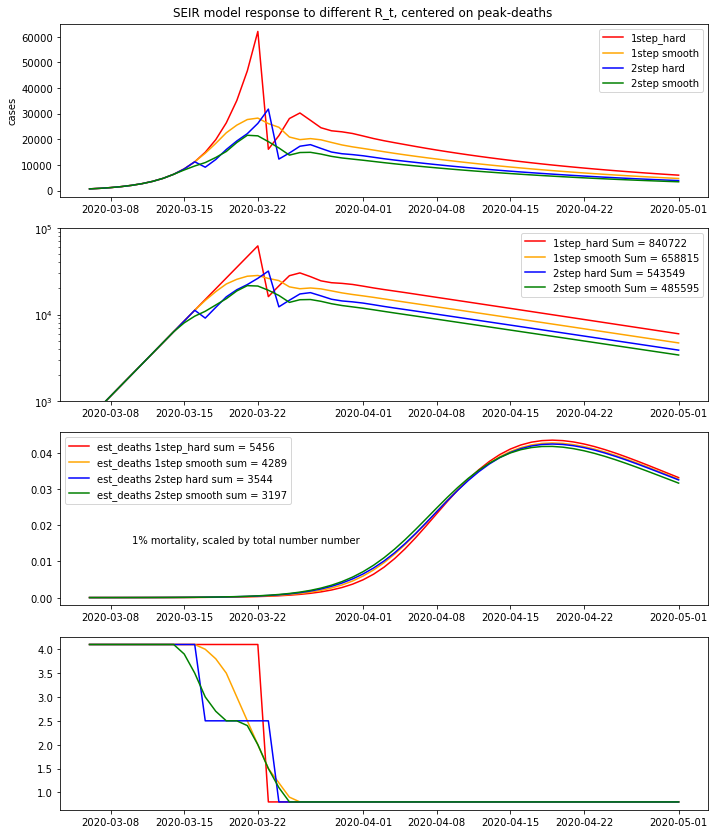

In [180]:
startdate = datetime.date(2020,2,12)
l = 80
ts = pd.date_range(startdate,periods=l,freq='D')
imported_at = np.array([1.5]*4+[0]*(l-4),dtype=np.float64)
#r = np.array([1.1]*100)

cp_hard = datetime.date(2020,3,23)
ocp_hard = (cp_hard-startdate).days
R_t_4hard = np.array([4.1]*ocp_hard+[0.8]*(l-ocp_hard),dtype=np.float64)
R_t_2step = np.array([4.1]*(ocp_hard-6)+[2.5]*7+[0.8]*(l-ocp_hard-1),dtype=np.float64)
R_t_2smooth = np.array([4.1]*(ocp_hard-8)+[3.9,3.5,3,2.7]+[2.5]*2+[2.4,2,1.5,1.1]+[0.8]*(l-ocp_hard-2),dtype=np.float64)
R_t_4_7d = np.array([4.1]*(ocp_hard-6)+[4,3.8,3.5,3,2.5,2,1.5,1.2,.9]+[.8]*(l-ocp_hard-3))
 

fig, axes = plt.subplots(4,1 , figsize = (10,12),squeeze=False)
fig.subplots_adjust(wspace=0.15,hspace=0.18,left=0.08,right=0.98,top=0.96,bottom=0.05)
ax,bx,cx,dx = axes[0,0],axes[1,0],axes[2,0],axes[3,0]
plasma = plt.cm.plasma

#,R_t_2step,R_t_2smooth
for k,R_t,c in zip(["1step_hard","1step smooth","2step hard","2step smooth"],[R_t_4hard,R_t_4_7d,R_t_2step,R_t_2smooth],["red","orange","blue","green"]):
    newI,newD = SEIR_model_deaths(83e6,imported_at,R_t,4,.446,25.,.275,.01)
    newD = newD[:l]
    print(len(R_t))
    fo = 23
    ax.plot(ts[fo:],newI[fo:],label=k,color=c)
    bx.semilogy(ts[fo:],newI[fo:],label=k+" Sum = %d"%np.sum(newI),color=c)
#    bx.semilogy(ts,newD,"--",label=k,color=c)
    cx.plot(ts[fo:],(newD/np.sum(newD))[fo:],label="est_deaths "+k+" sum = %d"%np.sum(newD),color=c)
    dx.plot(ts[fo:],R_t[fo:],label=k,color=c)

ax.legend()
ax.set_ylabel("cases")
fig.suptitle("SEIR model response to different R_t, centered on peak-deaths")
bx.legend()
cx.legend()
cx.text(datetime.date(2020,3,10),.015,"1% mortality, scaled by total number number")
bx.set_ylim(1000,1e5)
plt.savefig("reImperial_SEIR_centered_deaths.svg")